In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

In [2]:
# Read the North End Connect data file received on 27th December 2022 from Joel

northEndConnect = pd.read_csv("northendconnect.csv")

In [3]:
# Display a few rows of the data

display(northEndConnect.head(10))

,TEST ID,TEST DATE / UTC HOUR,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,MOBILE TEST,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015 10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015 10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015 10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015 10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015 10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
5,765,5/19/2015 10:00,49.897501,-97.136397,10.53,0.70,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020024.00,NaN
6,831,5/16/2015 10:00,49.946880,-97.058317,5.79,0.56,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020142.02,NaN
7,972,5/16/2015 10:00,49.878963,-97.158439,5.79,0.81,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020015.00,NaN
8,1110,5/19/2015 10:00,49.846671,-97.257653,1.88,1.81,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
9,1147,5/20/2015 10:01,49.937924,-97.118305,10.58,2.76,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020551.00,NaN


In [4]:
# Save the dataset into another aptly named variable to maintain the main
# data set

northEndConnectData = northEndConnect

In [5]:
# Display the names of the columns of the dataset to see how they appear in case they will
# be needed further down the line. . . . 

northEndConnectData.columns

Index(['TEST ID', 'TEST DATE / UTC HOUR', 'GEO LATITUDE', 'GEO LONGITUDE',
       'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS',
       'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE',
       'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED',
       'TEST SERVER', 'browser_test_url', 'CONTRACTED DOWNLOAD SPEED',
       'CONTRACTED UPLOAD SPEED', 'CONTRACTED DATA CAP',
       'CONTRACTED MONTHLY COST', 'SERVICE TYPE', 'USER SATISFACTION',
       'CONNECTION TYPE', 'USER COMMENTS', 'HEATMAP_MUNICIPALITY',
       'HEATMAP_CENSUS_TRACTS', 'HEATMAP_PROJECT_AREA'],
      dtype='object')

In [6]:
# Display the percentage of missing values in each column/field of data

northEndConnectData.isnull().sum()/len(northEndConnectData)*100

TEST ID                       0.000000
TEST DATE / UTC HOUR          0.000000
GEO LATITUDE                  0.000000
GEO LONGITUDE                 0.000000
DOWNLOAD SPEED                0.000000
UPLOAD SPEED                  0.000000
JITTER                       41.686086
LATENCY                      41.686086
PACKET LOSS                  41.686086
MOBILE TEST                   0.000000
ISP                           0.005178
CLIENT IP                     0.000000
CLIENT CITY                   0.284812
CLIENT PROVINCE               0.403915
CLIENT POSTAL CODE            0.134638
AS NUMBER                     0.108746
IPV6 SUPPORTED                0.000000
DNSSEC SUPPORTED              0.000000
TEST SERVER                   0.000000
browser_test_url             35.813785
CONTRACTED DOWNLOAD SPEED    81.497592
CONTRACTED UPLOAD SPEED      88.503961
CONTRACTED DATA CAP          92.843457
CONTRACTED MONTHLY COST      83.781265
SERVICE TYPE                 78.649474
USER SATISFACTION        

#### From the above line, it can be seen that the missing values in the columns
#### CONTRACTED DOWNLOAD SPEED, CONTRACTED UPLOAD SPEED, CONTRACTED DATA CAP, CONTRACTED MONTHLY COST,
#### SERVICE TYPE, USER SATISFACTION,CONNECTION TYPE, USER COMMENTS and HEATMAP_PROJECT_AREA
#### are more than FIFTY percent (50%). Infact they are in their 70s, 80s, and 90 PERCENTS.
#### These columns are CANDIDATES FOR REMOVAL.

## BLANK CELL

### Split the TEST DATE/UTC HOUR column into two columns.One holding TEST DATE and the other UTC HOUR¶

In [7]:
northEndConnectData_DateTimeSplit = northEndConnectData
testDate = []
utcHour = []

for value in northEndConnectData['TEST DATE / UTC HOUR']:
    spaceIndex = value.index(" ")
    dateData = value[:spaceIndex]
    timeData = value[spaceIndex:]
    testDate.append(dateData)
    utcHour.append(timeData)
    
northEndConnectData_DateTimeSplit.insert(2, "TEST DATE", testDate, True)
northEndConnectData_DateTimeSplit.insert(3, "TEST TIME",  utcHour, True)

northEndConnectData_DateTimeSplit

,TEST ID,TEST DATE / UTC HOUR,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015 10:00,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015 10:01,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015 10:00,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015 10:00,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015 10:00,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,1625869,1/3/2023 23:24,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19307,1625902,1/4/2023 1:42,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
19308,1625936,1/4/2023 3:06,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
19309,1625939,1/4/2023 3:08,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [8]:
# Having split the "TEST DATE / UTC TIME" column into the DATE and TIME columns, we can
# Drop the "TEST DATE / UTC TIME" column.

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR = northEndConnectData_DateTimeSplit.drop(columns = ['TEST DATE / UTC HOUR'])

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19307,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
19308,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
19309,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [9]:
# Display the contents of the ISP column

# Retrieve the contents of the ISP column as a DataFrame.
ispColumn = northEndConnect_SplitDate_dropTESTDATE_UTCHOUR[["ISP"]]

# Sort the contents of the obtained ISP column in ascending order. Save the change in the same DataFrame object.
ispColumn.sort_values(by = ['ISP'], inplace = True, ascending = True) 

# Display the the Unique entries of the ISP column.
ispColumn['ISP'].unique()

C:\Users\CFS\AppData\Local\Temp\ipykernel_13380\1773183968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispColumn.sort_values(by = ['ISP'], inplace = True, ascending = True)


array(['ACN', 'Access Communications  Co-operative Limited',
       'Access Communications Co-operative Limited',
       'Akamai Technologies, Inc.', 'Alberta Health Services',
       'Alentus Corporation', 'Altima Telecom', 'Amanah Tech',
       'Amanah Tech Inc.', 'Amazon Technologies Inc.', 'Amazon.com, Inc.',
       'BH Telecom Corp.', 'BIGPIPE', 'Bell Canada', 'Bell MTS',
       'Bell MTS Data Centres G.P', 'Bell Mobility', 'Bell Mobility, Inc',
       'Business Development Bank of Canada', 'CIBC World Markets',
       'CIK Telecom', 'CIK Telecom INC', 'Canada Drugs',
       'Cipherkey Exchange Corp.', 'City of Winnipeg', 'Cloudflare, Inc.',
       'Cogecodata', 'Cogent Communications', 'Commstream Communications',
       'Commstream Communications Inc', 'Corridor Communications',
       'Corridor Communications, INC.', 'Corus Entertainment Inc',
       'Daemon Defense Systems', 'DataCamp Limited', 'DigitalOcean, LLC',
       'Epic Information Solutions', 'Fastnet Communications',

#### From the Unique entries of the ISP, it is obvious that there are discrepancies in some entries. Some correction is needed.¶
#### The corrections in the ISP names should be handled by the program and not done manually. This way the program can be 
#### independent of human input.

#### The Autonomous System Numbers are used to handle this. Missing values are not allowed to avoid errors. . . .

In [10]:
# From the dataframe assessment, it is obvious that a small percentage of ISP entries is missing
# This can be removed although it may affect other values in other columns in the same row

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR.dropna(subset = ['ISP'], inplace = True)

In [12]:
# The columns for CLIENT CITY, CLIENT PROVINCE, CLIENT POSTAL CODE, and AS NUMBER are also missing some values
# These are less than 1 % so can also be removed as 99.9% of the data will be available for use.....

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR.dropna(subset = ['CLIENT CITY', 'CLIENT PROVINCE', 'CLIENT POSTAL CODE', 'AS NUMBER'], inplace = True)

In [14]:
northEndConnect_SplitDate_dropTESTDATE_UTCHOUR.isnull().sum()/len(northEndConnect_SplitDate_dropTESTDATE_UTCHOUR) *100

TEST ID                       0.000000
TEST DATE                     0.000000
TEST TIME                     0.000000
GEO LATITUDE                  0.000000
GEO LONGITUDE                 0.000000
DOWNLOAD SPEED                0.000000
UPLOAD SPEED                  0.000000
JITTER                       41.302195
LATENCY                      41.302195
PACKET LOSS                  41.302195
MOBILE TEST                   0.000000
ISP                           0.000000
CLIENT IP                     0.000000
CLIENT CITY                   0.000000
CLIENT PROVINCE               0.000000
CLIENT POSTAL CODE            0.000000
AS NUMBER                     0.000000
IPV6 SUPPORTED                0.000000
DNSSEC SUPPORTED              0.000000
TEST SERVER                   0.000000
browser_test_url             35.390711
CONTRACTED DOWNLOAD SPEED    81.379346
CONTRACTED UPLOAD SPEED      88.427253
CONTRACTED DATA CAP          92.795705
CONTRACTED MONTHLY COST      83.678257
SERVICE TYPE             

In [15]:
northEndConnect_SplitDate_dropTESTDATE_UTCHOUR.reset_index(inplace = True)

In [16]:
northEndConnect_SplitDate_dropTESTDATE_UTCHOUR.drop(columns = ['index'], inplace = True)

In [17]:
northEndConnect_SplitDate_dropTESTDATE_UTCHOUR

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19178,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19179,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
19180,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
19181,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [18]:
# Assessment on the Autonomous System numbers of each ISP.
# Retrieve all the unique Autonomous System numbers of each ISP.

ASNumbers = northEndConnect_SplitDate_dropTESTDATE_UTCHOUR['AS NUMBER']

In [19]:
# Save the Retrieved unique AS Numbers in a well named variable. 
# The vsriable will be a numpy array . . . . 

UniqueASNumber = ASNumbers.unique()

In [20]:
# Perform consistency assessment and implementation on the ISP. For ISP names that have the same AS Number
# Ensure that one name and one name alone is assigned to it. . . . 
# The assigned name will be based on which name has the longest length. . . . . .

DropColumns_northEndConnectData = northEndConnect_SplitDate_dropTESTDATE_UTCHOUR

ISP_CorrespondingTo_ASNumber = []

for value in UniqueASNumber:
    for index in range(len(DropColumns_northEndConnectData)):
        if (value == DropColumns_northEndConnectData.loc[index, 'AS NUMBER']):
            
            # print(DropColumns_northEndConnectData.loc[index, 'AS NUMBER'])
            # print(value)
            
            # retrieve the names of the ISPs corresponding to that AS number
            ASNumber_ISP = DropColumns_northEndConnectData.loc[index, 'ISP']
            # print(ASNumber_ISP)
            
            # print(ASNumber_ISP)
            ISP_CorrespondingTo_ASNumber.append(ASNumber_ISP)
            
        else:
            # print(DropColumns_northEndConnectData.loc[index, 'AS NUMBER'])
            pass    
           
    # ISP_CorrespondingTo_ASNumber2 = ISP_CorrespondingTo_ASNumber
    # print(ISP_CorrespondingTo_ASNumber2)    
    # break
        
    # After retrieving the ISP names corresponding to a particular ISP, check through each entry
    # to find out which one has the shortest length. . . . . . . .
    
    # Remove any leading or trailing spaces from the first entry
    ISP_CorrespondingTo_ASNumber[0] = ISP_CorrespondingTo_ASNumber[0].strip()
    
    # Remove any extra spaces in between 
    ISP_CorrespondingTo_ASNumber[0] = ISP_CorrespondingTo_ASNumber[0].replace("  ", " ")
    # print(f"ISP at position 0 is: {ISP_CorrespondingTo_ASNumber[0]}")
    
    
    
    # Assign the first entry to the variable . . . .
    longestLength = ISP_CorrespondingTo_ASNumber[0]
    # print(f"The short length string is: {shortestLength}")
    
    # print(len(ISP_CorrespondingTo_ASNumber))
    # break
    
    for length in range(1 , len(ISP_CorrespondingTo_ASNumber)):
        
        ISP_CorrespondingTo_ASNumber[length] = ISP_CorrespondingTo_ASNumber[length].strip() # Removing any leading or trailing spaces
        
        ISP_CorrespondingTo_ASNumber[length] = ISP_CorrespondingTo_ASNumber[length].replace("  ", " ") # Ensuring single space
        # print(f"This string is: {ISP_CorrespondingTo_ASNumber[length]}")
        # break 
        
        if(len(longestLength) <= len(ISP_CorrespondingTo_ASNumber[length])):
            # Assign the longest length to the variable
            # print(f"short length is {len(longestLength)} the other is {len(ISP_CorrespondingTo_ASNumber[length])}")
            longestLength = ISP_CorrespondingTo_ASNumber[length]
        
        else:
            # print(f"short length is {len(longestLength)} the other is {len(ISP_CorrespondingTo_ASNumber[length])}")
            pass
            
        # break
        
    # Replace the names for the AS Number with the shortest name obtained
    for parameter in range(len(DropColumns_northEndConnectData)):
        if (value == DropColumns_northEndConnectData.loc[parameter , 'AS NUMBER']):
            
            DropColumns_northEndConnectData.at[parameter, 'ISP'] = longestLength
            # DropColumns_northEndConnectData.loc[parameter, 'ISP']
            # break
        else:
            pass
         
    
    # Empty the list
    
    ISP_CorrespondingTo_ASNumber = []

In [21]:
DropColumns_northEndConnectData['ISP']

0        Shaw Communications Inc.
1        Shaw Communications Inc.
2            TeraGo Networks Inc.
3          Health Sciences Center
4        Shaw Communications Inc.
                   ...           
19178    Shaw Communications Inc.
19179    Shaw Communications Inc.
19180      Health Sciences Center
19181      Health Sciences Center
19182      Health Sciences Center
Name: ISP, Length: 19183, dtype: object

In [22]:
ISPColumn = DropColumns_northEndConnectData[['ISP']]

ISPColumn.sort_values(by = ['ISP'], inplace = True, ascending = True)

ISPColumn['ISP'].unique()

C:\Users\CFS\AppData\Local\Temp\ipykernel_13380\2585823883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISPColumn.sort_values(by = ['ISP'], inplace = True, ascending = True)


array(['ACN', 'Access Communications Co-operative Limited',
       'Akamai Technologies, Inc.', 'Alberta Health Services',
       'Alentus Corporation', 'Altima Telecom', 'Amanah Tech Inc.',
       'Amazon Technologies Inc.', 'BH Telecom Corp.', 'Bell Canada',
       'Bell MTS Data Centres G.P', 'Bell Mobility, Inc',
       'Business Development Bank of Canada', 'CIBC World Markets',
       'Canada Drugs', 'Cipherkey Exchange Corp.', 'City of Winnipeg',
       'Cloudflare, Inc.', 'Cogecodata', 'Cogent Communications',
       'Commstream Communications Inc', 'Corridor Communications, INC.',
       'Corus Entertainment Inc', 'Daemon Defense Systems',
       'DataCamp Limited', 'DigitalOcean, LLC',
       'Epic Information Solutions', 'Fastnet Communications',
       'Full Throttle Networks Inc.', 'GTCOMM - GloboTech Communications',
       'Health Sciences Center', 'Hextet Systems', 'High Speed Crow',
       'Hutterian Broadband Network Inc', 'I Voice Comm Telnetwork',
       'Infotec Ma

In [23]:
# There is need to check that the test was performed for each IP Address at MOST
# ONCE FOR EACH MONTH IN EACH YEAR. EACH IP ADDRESS IN A MONTH MUST BE TESTED ONLY ONCE.
# Where there is a test of more than one per month for each IP Adrress, ONE RECORD WILL BE KEPT AND THE
# OTHERS DELETED. . . . . 

northEndConnect_dropREPEATED_DAILYTEST = DropColumns_northEndConnectData.drop_duplicates(subset = ['CLIENT IP', 'TEST DATE'])

In [24]:
northEndConnect_dropREPEATED_DAILYTEST

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,1625674,1/3/2023,7:00,49.951400,-97.113300,161.63,76.91,5.93,100.17,4.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19175,1625736,1/3/2023,14:54,49.898494,-97.140377,40.50,49.10,1.15,35.67,0.00,...,NaN,NaN,NaN,NaN,NaN,ResWireless,None,Winnipeg,6020025.00,NaN
19177,1625821,1/3/2023,19:30,49.871082,-97.302602,8.39,13.24,12.76,7.94,0.27,...,10,Unlimited,100,Home,1.0,Cable,Too expensive,Winnipeg,6020537.02,NaN
19179,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W


In [25]:
northEndConnect_dropREPEATED_DAILYTEST.reset_index(inplace = True)

In [26]:
northEndConnect_dropREPEATED_DAILYTEST.drop(columns=['index'], inplace = True)

C:\Users\CFS\AppData\Local\Temp\ipykernel_13380\253471241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northEndConnect_dropREPEATED_DAILYTEST.drop(columns=['index'], inplace = True)


In [27]:
northEndConnect_dropREPEATED_DAILYTEST

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,1625674,1/3/2023,7:00,49.951400,-97.113300,161.63,76.91,5.93,100.17,4.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
7859,1625736,1/3/2023,14:54,49.898494,-97.140377,40.50,49.10,1.15,35.67,0.00,...,NaN,NaN,NaN,NaN,NaN,ResWireless,None,Winnipeg,6020025.00,NaN
7860,1625821,1/3/2023,19:30,49.871082,-97.302602,8.39,13.24,12.76,7.94,0.27,...,10,Unlimited,100,Home,1.0,Cable,Too expensive,Winnipeg,6020537.02,NaN
7861,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W


In [28]:
northEndConnect_dropREPEATED_DAILYTEST.isnull().sum() / len(northEndConnect_dropREPEATED_DAILYTEST)*100

TEST ID                       0.000000
TEST DATE                     0.000000
TEST TIME                     0.000000
GEO LATITUDE                  0.000000
GEO LONGITUDE                 0.000000
DOWNLOAD SPEED                0.000000
UPLOAD SPEED                  0.000000
JITTER                       47.526389
LATENCY                      47.526389
PACKET LOSS                  47.526389
MOBILE TEST                   0.000000
ISP                           0.000000
CLIENT IP                     0.000000
CLIENT CITY                   0.000000
CLIENT PROVINCE               0.000000
CLIENT POSTAL CODE            0.000000
AS NUMBER                     0.000000
IPV6 SUPPORTED                0.000000
DNSSEC SUPPORTED              0.000000
TEST SERVER                   0.000000
browser_test_url             40.239094
CONTRACTED DOWNLOAD SPEED    81.788122
CONTRACTED UPLOAD SPEED      89.469668
CONTRACTED DATA CAP          92.254865
CONTRACTED MONTHLY COST      83.479588
SERVICE TYPE             

## BLANK

### Retrieve the Area Code from the Postal Code and Save in Appropriately named column

In [29]:
northEndConnect_GetAreaCode_from_PostalCode = northEndConnect_dropREPEATED_DAILYTEST

areaCode = []

for code in northEndConnect_GetAreaCode_from_PostalCode['CLIENT POSTAL CODE']:
    aCode = code[:3]
    areaCode.append(aCode)
    
northEndConnect_GetAreaCode_from_PostalCode["AREA_CODE"] = areaCode

C:\Users\CFS\AppData\Local\Temp\ipykernel_13380\3969313713.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northEndConnect_GetAreaCode_from_PostalCode["AREA_CODE"] = areaCode


In [30]:
northEndConnect_GetAreaCode_from_PostalCode

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA,AREA_CODE
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN,R3K
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN,R3R
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN,R3C
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN,R3T
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN,R3G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,1625674,1/3/2023,7:00,49.951400,-97.113300,161.63,76.91,5.93,100.17,4.77,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN,R2V
7859,1625736,1/3/2023,14:54,49.898494,-97.140377,40.50,49.10,1.15,35.67,0.00,...,NaN,NaN,NaN,NaN,ResWireless,None,Winnipeg,6020025.00,NaN,R3B
7860,1625821,1/3/2023,19:30,49.871082,-97.302602,8.39,13.24,12.76,7.94,0.27,...,Unlimited,100,Home,1.0,Cable,Too expensive,Winnipeg,6020537.02,NaN,R3K
7861,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W,R2W


In [31]:
# DROP COLUMNS THAT ARE NOT USEFUL FOR THE OBJECTIVE. . . . . 

northEndConnect_DropInEffective_Columns = northEndConnect_GetAreaCode_from_PostalCode.drop(columns = ['browser_test_url', 'CONTRACTED DOWNLOAD SPEED',
                                                                                                      'CONTRACTED UPLOAD SPEED','CONTRACTED DATA CAP',
                                                                                                      'CONTRACTED MONTHLY COST','SERVICE TYPE', 'USER SATISFACTION',
                                                                                                      'CONNECTION TYPE', 'USER COMMENTS', 'HEATMAP_PROJECT_AREA'])

In [32]:
northEndConnect_DropInEffective_Columns.isnull().sum()/northEndConnect_DropInEffective_Columns.shape[0] * 100

TEST ID                   0.000000
TEST DATE                 0.000000
TEST TIME                 0.000000
GEO LATITUDE              0.000000
GEO LONGITUDE             0.000000
DOWNLOAD SPEED            0.000000
UPLOAD SPEED              0.000000
JITTER                   47.526389
LATENCY                  47.526389
PACKET LOSS              47.526389
MOBILE TEST               0.000000
ISP                       0.000000
CLIENT IP                 0.000000
CLIENT CITY               0.000000
CLIENT PROVINCE           0.000000
CLIENT POSTAL CODE        0.000000
AS NUMBER                 0.000000
IPV6 SUPPORTED            0.000000
DNSSEC SUPPORTED          0.000000
TEST SERVER               0.000000
HEATMAP_MUNICIPALITY      0.000000
HEATMAP_CENSUS_TRACTS     0.000000
AREA_CODE                 0.000000
dtype: float64

In [33]:
northEndConnect_DropInEffective_Columns

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CLIENT CITY,CLIENT PROVINCE,CLIENT POSTAL CODE,AS NUMBER,IPV6 SUPPORTED,DNSSEC SUPPORTED,TEST SERVER,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,AREA_CODE
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,Winnipeg,MB,R3K0G8,AS6327,False,False,Calgary,Winnipeg,6020537.02,R3K
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,Winnipeg,MB,R3R2R3,AS6327,False,False,Toronto,Winnipeg,6020522.02,R3R
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,Winnipeg,MB,R3C3J7,AS20161,False,False,Toronto,Winnipeg,6020014.00,R3C
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,Winnipeg,MB,R3T4M7,AS7122,False,False,Montreal,Winnipeg,6020501.02,R3T
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,Winnipeg,MB,R3G0Z9,AS6327,False,False,Toronto,Winnipeg,6020016.00,R3G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,1625674,1/3/2023,7:00,49.951400,-97.113300,161.63,76.91,5.93,100.17,4.77,...,Winnipeg,MB,R2V3J2,AS6327,True,False,Toronto,Winnipeg,6020553.00,R2V
7859,1625736,1/3/2023,14:54,49.898494,-97.140377,40.50,49.10,1.15,35.67,0.00,...,Winnipeg,MB,R3B1G6,AS16796,False,False,Toronto,Winnipeg,6020025.00,R3B
7860,1625821,1/3/2023,19:30,49.871082,-97.302602,8.39,13.24,12.76,7.94,0.27,...,Ottawa,ON,R3K1L7,AS2665,False,False,Toronto,Winnipeg,6020537.02,R3K
7861,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,Winnipeg,MB,R2W1E2,AS6327,True,False,Toronto,Winnipeg,6020041.00,R2W


In [34]:
# The columns for JITTER, LATENCY, and PACKET LOSS are also missing some values
# These are UP TO 48%. Since there is no way to fill them, as by the TEST TIME these 
# parameters have not been measured, the best is to dealete them and the consequent rows of
# other data.....

northEndConnect_DropInEffective_Columns.dropna(subset = ['JITTER', 'LATENCY', 'PACKET LOSS'], inplace = True)

In [35]:
northEndConnect_DropInEffective_Columns.reset_index(inplace = True)

In [36]:
northEndConnect_DropInEffective_Columns.drop(columns = ['index'], inplace = True)

In [37]:
northEndConnect_DropInEffective_Columns

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CLIENT CITY,CLIENT PROVINCE,CLIENT POSTAL CODE,AS NUMBER,IPV6 SUPPORTED,DNSSEC SUPPORTED,TEST SERVER,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,AREA_CODE
0,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,0.52,...,Winnipeg,MB,R2K3L4,AS6327,True,False,Winnipeg,Winnipeg,6020130.02,R2K
1,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,0.00,...,Winnipeg,MB,R3R1E6,AS6327,True,False,Winnipeg,Winnipeg,6020521.01,R3R
2,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,1.63,...,Winnipeg,MB,R3Y0R3,AS6327,False,False,Vancouver,Winnipeg,6020500.11,R3Y
3,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,1.10,...,Winnipeg,MB,R3M0Y3,AS7122,False,False,Winnipeg,Winnipeg,6020003.00,R3M
4,810587,9/29/2019,17:56,49.877336,-97.182648,2.33,1.82,29.84,72.49,0.00,...,Winnipeg,MB,R3N0A2,AS7122,False,False,Winnipeg,Winnipeg,6020008.00,R3N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,1625674,1/3/2023,7:00,49.951400,-97.113300,161.63,76.91,5.93,100.17,4.77,...,Winnipeg,MB,R2V3J2,AS6327,True,False,Toronto,Winnipeg,6020553.00,R2V
4122,1625736,1/3/2023,14:54,49.898494,-97.140377,40.50,49.10,1.15,35.67,0.00,...,Winnipeg,MB,R3B1G6,AS16796,False,False,Toronto,Winnipeg,6020025.00,R3B
4123,1625821,1/3/2023,19:30,49.871082,-97.302602,8.39,13.24,12.76,7.94,0.27,...,Ottawa,ON,R3K1L7,AS2665,False,False,Toronto,Winnipeg,6020537.02,R3K
4124,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,Winnipeg,MB,R2W1E2,AS6327,True,False,Toronto,Winnipeg,6020041.00,R2W


In [38]:
# Retieve data for Winnipeg Area only....

# Retrieve the data for the Client City name containing Winnipeg. . . . 

WinnipegArea = northEndConnect_DropInEffective_Columns[northEndConnect_DropInEffective_Columns['CLIENT CITY'].str.contains('Winnipeg', case = False, na = False)]

In [39]:
WinnipegArea.reset_index(inplace = True)

In [40]:
WinnipegArea.drop(columns = ['index'], inplace = True)

C:\Users\CFS\AppData\Local\Temp\ipykernel_13380\3860280212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WinnipegArea.drop(columns = ['index'], inplace = True)


In [41]:
WinnipegArea

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CLIENT CITY,CLIENT PROVINCE,CLIENT POSTAL CODE,AS NUMBER,IPV6 SUPPORTED,DNSSEC SUPPORTED,TEST SERVER,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,AREA_CODE
0,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,0.52,...,Winnipeg,MB,R2K3L4,AS6327,True,False,Winnipeg,Winnipeg,6020130.02,R2K
1,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,0.00,...,Winnipeg,MB,R3R1E6,AS6327,True,False,Winnipeg,Winnipeg,6020521.01,R3R
2,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,1.63,...,Winnipeg,MB,R3Y0R3,AS6327,False,False,Vancouver,Winnipeg,6020500.11,R3Y
3,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,1.10,...,Winnipeg,MB,R3M0Y3,AS7122,False,False,Winnipeg,Winnipeg,6020003.00,R3M
4,810587,9/29/2019,17:56,49.877336,-97.182648,2.33,1.82,29.84,72.49,0.00,...,Winnipeg,MB,R3N0A2,AS7122,False,False,Winnipeg,Winnipeg,6020008.00,R3N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,1625673,1/3/2023,6:59,49.919200,-97.126300,51.14,46.86,0.24,34.85,6.14,...,Winnipeg,MB,R2W1E2,AS7122,False,False,Toronto,Winnipeg,6020041.00,R2W
3922,1625674,1/3/2023,7:00,49.951400,-97.113300,161.63,76.91,5.93,100.17,4.77,...,Winnipeg,MB,R2V3J2,AS6327,True,False,Toronto,Winnipeg,6020553.00,R2V
3923,1625736,1/3/2023,14:54,49.898494,-97.140377,40.50,49.10,1.15,35.67,0.00,...,Winnipeg,MB,R3B1G6,AS16796,False,False,Toronto,Winnipeg,6020025.00,R3B
3924,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,Winnipeg,MB,R2W1E2,AS6327,True,False,Toronto,Winnipeg,6020041.00,R2W


### The last dataframe contains information on test performed per month per IP
### in All the Winnipeg Area Codes. . . . . . . 

In [42]:
# Categorize the Nature of Internet Service . . . . 

WinnipegArea_InternetCategory = WinnipegArea


InternetCategory = []

for value in range(len(WinnipegArea_InternetCategory)):
    if((WinnipegArea_InternetCategory.loc[value, 'DOWNLOAD SPEED'] >= 50) 
    and (WinnipegArea_InternetCategory.loc[value, 'UPLOAD SPEED'] >= 10) 
    and (WinnipegArea_InternetCategory.loc[value, 'JITTER'] <= 5) 
    and (WinnipegArea_InternetCategory.loc[value, 'LATENCY'] <= 50) 
    and (WinnipegArea_InternetCategory.loc[value, 'PACKET LOSS'] <= 0.25)):
        
        internetStatus = "Good Internet Quality"
        
    else:
        
        internetStatus = "Poor Internet Quality"
        
    InternetCategory.append(internetStatus) 
    
WinnipegArea_InternetCategory.insert(11, "INTERNET_CATEGORY", InternetCategory, True)    

In [43]:
WinnipegArea_InternetCategory

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CLIENT CITY,CLIENT PROVINCE,CLIENT POSTAL CODE,AS NUMBER,IPV6 SUPPORTED,DNSSEC SUPPORTED,TEST SERVER,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,AREA_CODE
0,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,0.52,...,Winnipeg,MB,R2K3L4,AS6327,True,False,Winnipeg,Winnipeg,6020130.02,R2K
1,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,0.00,...,Winnipeg,MB,R3R1E6,AS6327,True,False,Winnipeg,Winnipeg,6020521.01,R3R
2,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,1.63,...,Winnipeg,MB,R3Y0R3,AS6327,False,False,Vancouver,Winnipeg,6020500.11,R3Y
3,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,1.10,...,Winnipeg,MB,R3M0Y3,AS7122,False,False,Winnipeg,Winnipeg,6020003.00,R3M
4,810587,9/29/2019,17:56,49.877336,-97.182648,2.33,1.82,29.84,72.49,0.00,...,Winnipeg,MB,R3N0A2,AS7122,False,False,Winnipeg,Winnipeg,6020008.00,R3N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,1625673,1/3/2023,6:59,49.919200,-97.126300,51.14,46.86,0.24,34.85,6.14,...,Winnipeg,MB,R2W1E2,AS7122,False,False,Toronto,Winnipeg,6020041.00,R2W
3922,1625674,1/3/2023,7:00,49.951400,-97.113300,161.63,76.91,5.93,100.17,4.77,...,Winnipeg,MB,R2V3J2,AS6327,True,False,Toronto,Winnipeg,6020553.00,R2V
3923,1625736,1/3/2023,14:54,49.898494,-97.140377,40.50,49.10,1.15,35.67,0.00,...,Winnipeg,MB,R3B1G6,AS16796,False,False,Toronto,Winnipeg,6020025.00,R3B
3924,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,Winnipeg,MB,R2W1E2,AS6327,True,False,Toronto,Winnipeg,6020041.00,R2W


In [44]:
SelectedAreaCode = WinnipegArea[WinnipegArea['AREA_CODE'].isin(['R2J','R3K','R3P','R3R','R2W'])]

In [45]:
SelectedAreaCode.groupby('AREA_CODE')['INTERNET_CATEGORY'].value_counts().unstack()

INTERNET_CATEGORY,Good Internet Quality,Poor Internet Quality
AREA_CODE,,
R2J,14,96
R2W,26,240
R3K,12,47
R3P,11,84
R3R,24,135


<AxesSubplot:xlabel='AREA_CODE'>

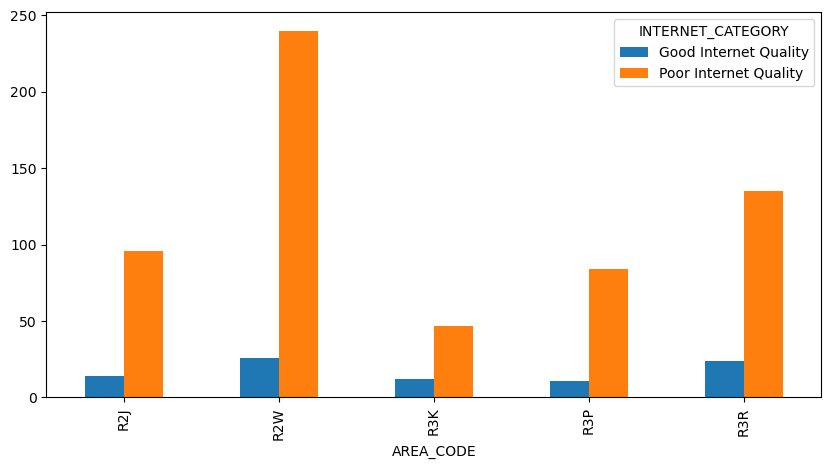

In [46]:
SelectedAreaCode.groupby('AREA_CODE')['INTERNET_CATEGORY'].value_counts().unstack().plot(kind = 'bar', figsize = (10, 5))

In [47]:
v1 = SelectedAreaCode.groupby('AREA_CODE')['INTERNET_CATEGORY'].value_counts().unstack()

# Calculate the Percentage make up for each row of data

valuesum = 0
percentage = 0
percentHigh = []
percentLow = []

for i in range(len(v1)):
    valuesum = (v1.iloc[i, 0] + v1.iloc[i, 1])
    # print(valuesum)
    highRatio = (v1.iloc[i, 0] / valuesum) * 100
    lowRatio =  (v1.iloc[i, 1] / valuesum) * 100
    percentHigh.append(highRatio)
    percentLow.append(lowRatio)
    
v1['Percentage of GIQ'] = percentHigh
v1['Percentage of PIQ'] = percentLow

v1

INTERNET_CATEGORY,Good Internet Quality,Poor Internet Quality,Percentage of GIQ,Percentage of PIQ
AREA_CODE,,,,
R2J,14,96,12.727273,87.272727
R2W,26,240,9.774436,90.225564
R3K,12,47,20.338983,79.661017
R3P,11,84,11.578947,88.421053
R3R,24,135,15.094340,84.905660


In [48]:
WinnipegArea_Good_Quality_Internet = WinnipegArea[WinnipegArea['INTERNET_CATEGORY'] == 'Good Internet Quality']

WinnipegArea_Good_Quality_Internet.reset_index(inplace = True)

WinnipegArea_Good_Quality_Internet.drop(columns = ['index'], inplace = True)

C:\Users\CFS\AppData\Local\Temp\ipykernel_13380\1071741957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WinnipegArea_Good_Quality_Internet.drop(columns = ['index'], inplace = True)


In [49]:
v2 = WinnipegArea_Good_Quality_Internet.groupby(['AREA_CODE']).INTERNET_CATEGORY.value_counts().sort_values(ascending = False)
v2

AREA_CODE  INTERNET_CATEGORY    
R3T        Good Internet Quality    65
R3Y        Good Internet Quality    30
R2N        Good Internet Quality    26
R2W        Good Internet Quality    26
R3R        Good Internet Quality    24
R2Y        Good Internet Quality    24
R3B        Good Internet Quality    23
R3G        Good Internet Quality    21
R3C        Good Internet Quality    20
R3M        Good Internet Quality    19
R2V        Good Internet Quality    17
R2M        Good Internet Quality    17
R2K        Good Internet Quality    17
R3N        Good Internet Quality    16
R3J        Good Internet Quality    15
R2G        Good Internet Quality    14
R2J        Good Internet Quality    14
R3L        Good Internet Quality    14
R2P        Good Internet Quality    12
R3K        Good Internet Quality    12
R2X        Good Internet Quality    11
R3P        Good Internet Quality    11
R2H        Good Internet Quality    10
R2C        Good Internet Quality    10
R3X        Good Internet Qualit

In [50]:
v2dataFrame = pd.DataFrame(v2)

v2dataFrame.head(10)

,,INTERNET_CATEGORY
AREA_CODE,INTERNET_CATEGORY,
R3T,Good Internet Quality,65
R3Y,Good Internet Quality,30
R2N,Good Internet Quality,26
R2W,Good Internet Quality,26
R3R,Good Internet Quality,24
R2Y,Good Internet Quality,24
R3B,Good Internet Quality,23
R3G,Good Internet Quality,21
R3C,Good Internet Quality,20


<AxesSubplot:xlabel='AREA_CODE'>

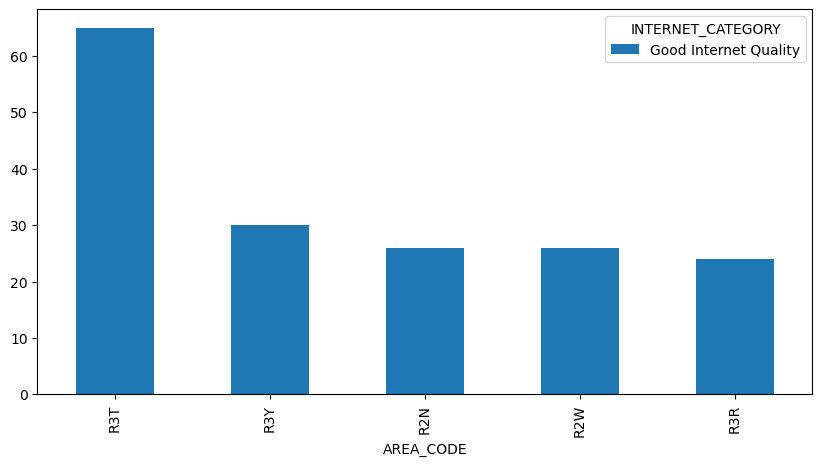

In [56]:
# The Top 5 Areas with Good Quality Internet

v2dataFrame.head(5).unstack().plot(kind = 'bar', figsize = (10, 5), y = 'INTERNET_CATEGORY')

In [60]:
v2dataFrame.tail(10)

,,INTERNET_CATEGORY
AREA_CODE,INTERNET_CATEGORY,
R3X,Good Internet Quality,8
R2R,Good Internet Quality,8
R2L,Good Internet Quality,7
R3E,Good Internet Quality,4
R3W,Good Internet Quality,4
R3A,Good Internet Quality,3
R3V,Good Internet Quality,3
R3H,Good Internet Quality,2
R0G,Good Internet Quality,1


<AxesSubplot:xlabel='AREA_CODE'>

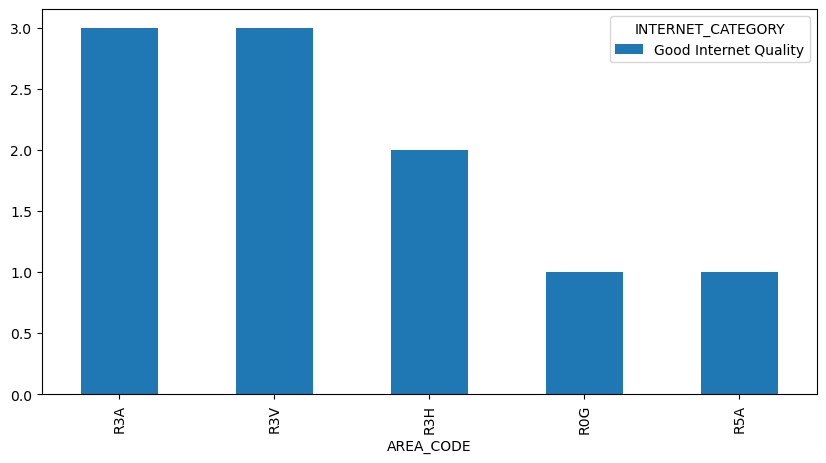

In [57]:
# The Bottom 5 Areas with Good Quality Internet

v2dataFrame.tail(5).unstack().plot(kind = 'bar', figsize = (10,5), y = 'INTERNET_CATEGORY')

In [53]:
WinnipegArea_Low_Quality_Internet = WinnipegArea[WinnipegArea['INTERNET_CATEGORY'] == 'Poor Internet Quality']

WinnipegArea_Low_Quality_Internet.reset_index(inplace = True)

WinnipegArea_Low_Quality_Internet.drop(columns = ['index'], inplace = True)

C:\Users\CFS\AppData\Local\Temp\ipykernel_13380\989716762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WinnipegArea_Low_Quality_Internet.drop(columns = ['index'], inplace = True)


In [54]:
v3 = WinnipegArea_Low_Quality_Internet.groupby(['AREA_CODE']).INTERNET_CATEGORY.value_counts().sort_values(ascending = False)
v3

AREA_CODE  INTERNET_CATEGORY    
R3C        Poor Internet Quality    295
R3T        Poor Internet Quality    271
R2W        Poor Internet Quality    240
R3G        Poor Internet Quality    199
R2V        Poor Internet Quality    190
R2N        Poor Internet Quality    185
R3J        Poor Internet Quality    141
R3R        Poor Internet Quality    135
R2M        Poor Internet Quality    134
R3L        Poor Internet Quality    128
R3B        Poor Internet Quality    124
R3M        Poor Internet Quality    121
R2C        Poor Internet Quality    119
R2K        Poor Internet Quality    116
R2G        Poor Internet Quality    113
R2J        Poor Internet Quality     96
R2Y        Poor Internet Quality     96
R3Y        Poor Internet Quality     93
R3P        Poor Internet Quality     84
R2P        Poor Internet Quality     80
R3N        Poor Internet Quality     67
R2H        Poor Internet Quality     66
R3X        Poor Internet Quality     60
R3K        Poor Internet Quality     47
R3E    

In [55]:
v3dataFrame = pd.DataFrame(v3)

v3dataFrame.head(10)

,,INTERNET_CATEGORY
AREA_CODE,INTERNET_CATEGORY,
R3C,Poor Internet Quality,295
R3T,Poor Internet Quality,271
R2W,Poor Internet Quality,240
R3G,Poor Internet Quality,199
R2V,Poor Internet Quality,190
R2N,Poor Internet Quality,185
R3J,Poor Internet Quality,141
R3R,Poor Internet Quality,135
R2M,Poor Internet Quality,134


<AxesSubplot:xlabel='AREA_CODE'>

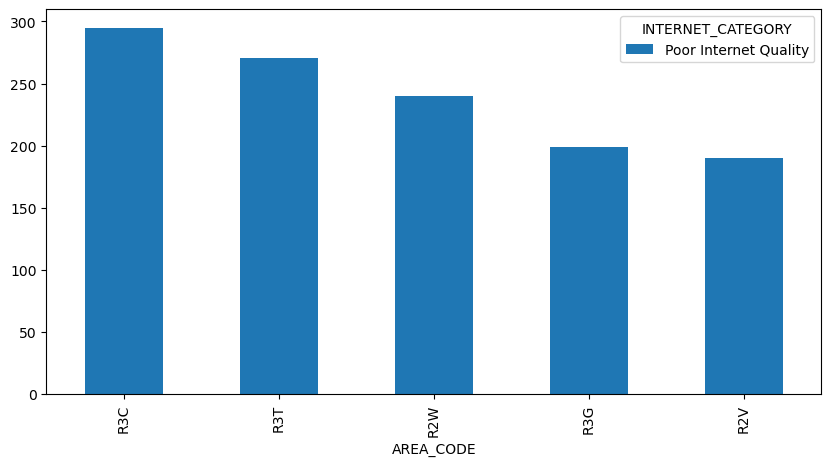

In [59]:
# The Top 5 Areas with Poor Quality Internet


v3dataFrame.head(5).unstack().plot(kind = 'bar', figsize = (10, 5), y = 'INTERNET_CATEGORY')

In [62]:
v3dataFrame.tail(10)

,,INTERNET_CATEGORY
AREA_CODE,INTERNET_CATEGORY,
R3E,Poor Internet Quality,38
R2X,Poor Internet Quality,38
R2R,Poor Internet Quality,33
R2L,Poor Internet Quality,30
R3V,Poor Internet Quality,30
R3W,Poor Internet Quality,21
R3H,Poor Internet Quality,18
R3A,Poor Internet Quality,7
J0S,Poor Internet Quality,1


<AxesSubplot:xlabel='AREA_CODE'>

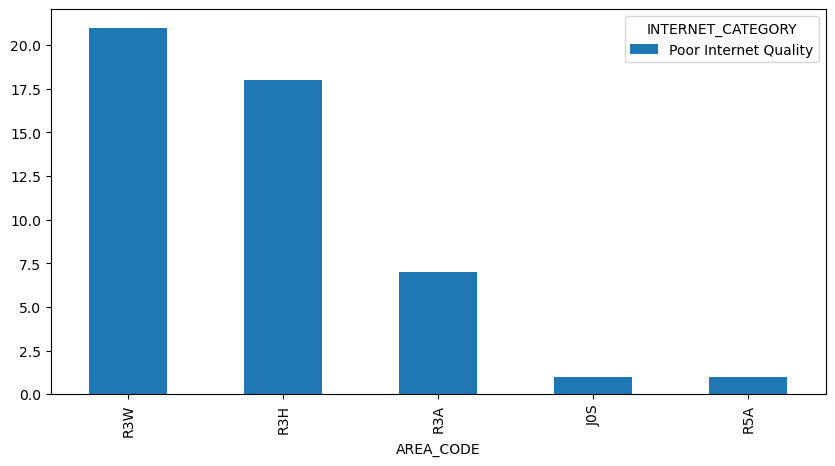

In [63]:
# The Bottom 5 Areas with Poor Quality Internet


v3dataFrame.tail(5).unstack().plot(kind = 'bar', figsize = (10, 5), y = 'INTERNET_CATEGORY')